# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [2]:
import tensorflow as tf

## Get the dataset

In [3]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [5]:
# Pre processing 
print(X_train.shape,Y_train.shape )

(8000, 28, 28) (8000,)


## Visualize the dataset
Print some images with labels.

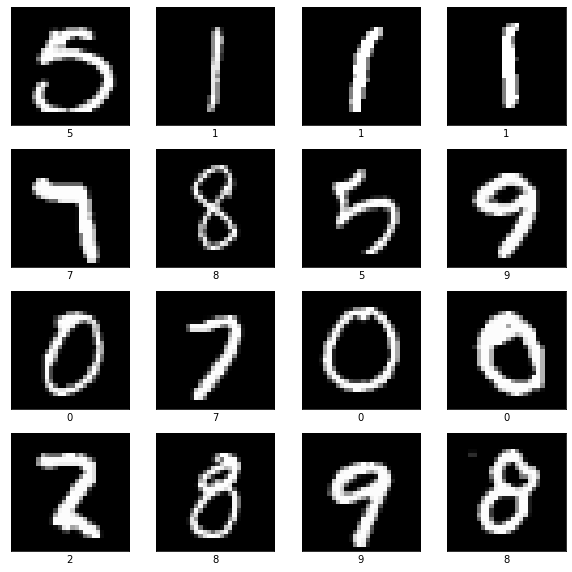

In [8]:
import matplotlib.pyplot as plt

# Your code
plt.figure(figsize=(10,10))
for i in range(16):
    # define subplot
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(Y_train[i])

  #plt.show()

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

In [9]:
import numpy as np
print(np.unique(Y_train))
print(np.unique(Y_test))
# Your code

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
import numpy as np
unique, counts = np.unique(Y_train, return_counts=True)

print( np.array((unique, counts)).T)

[[  0 785]
 [  1 927]
 [  2 805]
 [  3 789]
 [  4 788]
 [  5 717]
 [  6 766]
 [  7 837]
 [  8 783]
 [  9 803]]


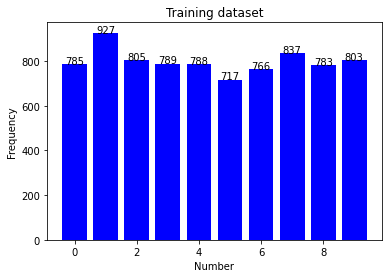

In [11]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')
plt.bar(unique,counts, color='blue')
plt.title("Training dataset")
plt.xlabel("Number")
plt.ylabel("Frequency")
addlabels(unique, counts)
plt.show()

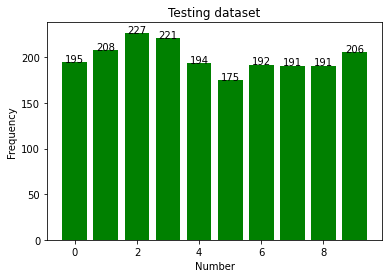

In [12]:
unique, counts = np.unique(Y_test, return_counts=True)
plt.bar(unique,counts, color='green')
plt.title("Testing dataset")
plt.xlabel("Number")
plt.ylabel("Frequency")
addlabels(unique, counts)
plt.show()

## Model

In [13]:
from tensorflow.keras import datasets, layers, models

In [14]:
# model building

# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                6

In [18]:
# Compile the model (add optimizers and metrics)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [19]:
# Fit the model on the training data (specify validation_split, read about validation if new to you)
history=model.fit(X_train,Y_train,epochs=15,
                 validation_split=0.2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


200/200 [==============================] - 8s 38ms/step - loss: 1.5453 - accuracy: 0.7947 - val_loss: 0.2541 - val_accuracy: 0.9231
Epoch 2/15
200/200 [==============================] - 8s 40ms/step - loss: 0.1661 - accuracy: 0.9509 - val_loss: 0.1638 - val_accuracy: 0.9513
Epoch 3/15
200/200 [==============================] - 8s 39ms/step - loss: 0.0890 - accuracy: 0.9731 - val_loss: 0.1579 - val_accuracy: 0.9538
Epoch 4/15
200/200 [==============================] - 12s 58ms/step - loss: 0.0614 - accuracy: 0.9784 - val_loss: 0.1625 - val_accuracy: 0.9569
Epoch 5/15
200/200 [==============================] - 7s 36ms/step - loss: 0.0349 - accuracy: 0.9883 - val_loss: 0.0977 - val_accuracy: 0.9744
Epoch 6/15
200/200 [==============================] - 7s 35ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.1402 - val_accuracy: 0.9669
Epoch 7/15
200/200 [==============================] - 7s 36ms/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.0988 - val_accuracy: 0.9719
Epoch 8/1

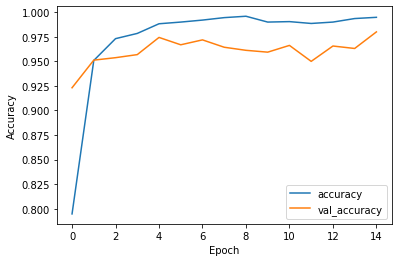

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [21]:
loss, accuracy = model.evaluate(X_test,Y_test, verbose=2)
print("Accuracy of the model: " ,accuracy*100 ,"%")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 - 1s - loss: 0.1678 - accuracy: 0.9665 - 782ms/epoch - 12ms/step
Accuracy of the model:  96.64999842643738 %


In [22]:
prediction=model.predict(X_test[:36])

## Predict some images
Print the image along with its label (true value) and predicted value.

In [23]:
answer_arr=[]
for i in range(36):
  n=np.where(prediction[i]==max(prediction[i]))
  answer_arr.append(n)

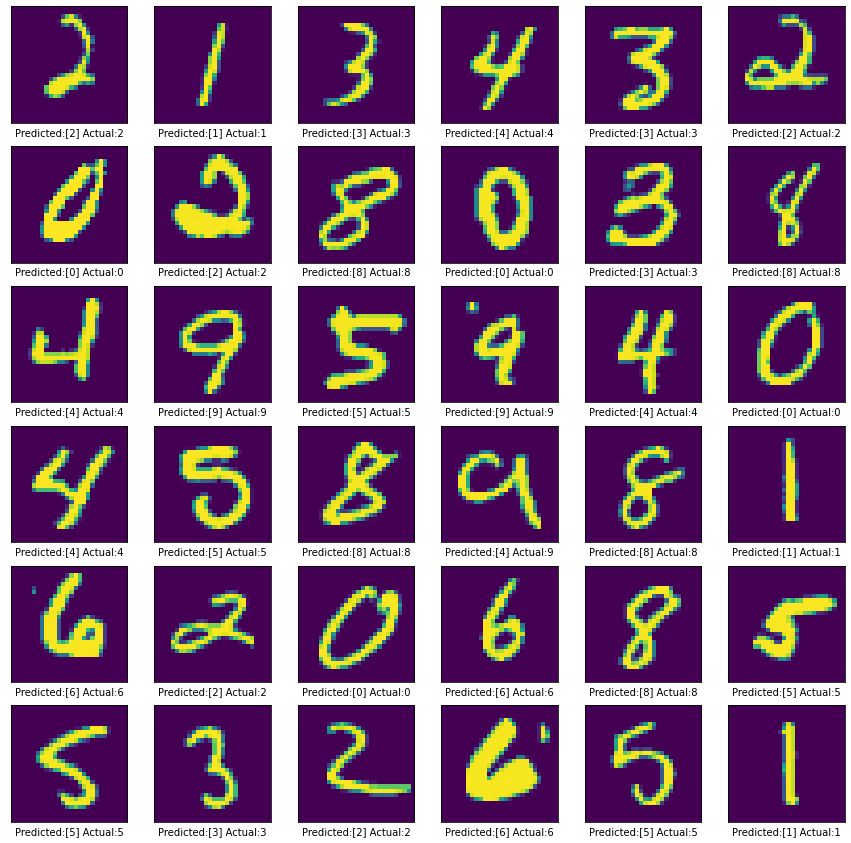

In [24]:
# Your code
plt.figure(figsize=(15,15))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel("Predicted:" f"{answer_arr[i][0]}" " "  "Actual:" f"{Y_test[i]}")
    #plt.xlabel()